In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
import sklearn as sk
import tensorflow as tf

In [2]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensor Flow Version: 2.6.2
Keras Version: 2.6.0


In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Feed-Forward-Network

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500,noise=0.2,random_state=3)

Text(0, 0.5, 'X1')

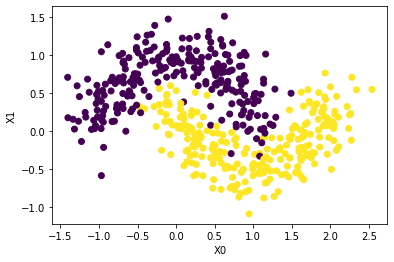

In [37]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('X0')
plt.ylabel('X1')

In [38]:
arr = X

In [39]:
np.ones((arr.shape[0], 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [40]:
np.hstack([arr,np.ones((arr.shape[0], 1))]) 

array([[-0.33629894,  1.06167458,  1.        ],
       [ 0.10267968,  0.16155927,  1.        ],
       [ 0.64503905,  0.54971326,  1.        ],
       ...,
       [-0.96905358, -0.58347601,  1.        ],
       [-0.26815916,  0.76410682,  1.        ],
       [ 0.77706786, -0.18641447,  1.        ]])

In [41]:
def add_bias(arr):
    #arr = np.c_[arr, np.ones((arr.shape[0], 1))]
    arr = np.hstack([arr,np.ones((arr.shape[0], 1))]) 
    return arr

In [42]:
X = add_bias(X)
X.shape

(500, 3)

In [43]:
X[0]

array([-0.33629894,  1.06167458,  1.        ])

In [44]:
def sigmoid(X):
    s = 1/(1+np.exp(-X))
    return s

In [45]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [46]:
weights_h = np.random.random(size = (3,2))
weights_o = np.random.random(size = (3,1))

In [47]:
weights_h

array([[0.56290961, 0.18235635],
       [0.19456883, 0.02570116],
       [0.83945826, 0.46008747]])

In [48]:
weights_o

array([[0.51237459],
       [0.99499828],
       [0.82481154]])

In [49]:
weights_h.shape

(3, 2)

In [50]:
weights_o.shape

(3, 1)

In [51]:
X.shape, weights_h.shape

((500, 3), (3, 2))

In [52]:
output = sigmoid(np.dot(add_bias(sigmoid(np.dot(X, weights_h))),weights_o))

In [53]:
def feed_forward(X, weights_h, weights_o):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    # 1. H_in
    weighted_sum = np.dot(X, weights_h)
    print(f'Shape of H_in = {weighted_sum.shape}')
    #print('H_in')
    #print(weighted_sum)
    
    # 2. H_out
    output_1 = sigmoid(weighted_sum)
    #print('H_out')
    #print(output_1)
    
    # 3. add bias
    input_out = add_bias(output_1)
    #print('H_out with bias')
    #print(input_out)
    
    # 4. O_in
    print(f'Shape of H_in = {weighted_sum.shape}')
    weighted_sum = np.dot(input_out, weights_o)
    #print('O_in')
    #print(weighted_sum)
    
    # 5. O_out -> actual prediction
    output_2 = sigmoid(weighted_sum)
    #print('O_out')
    #print(output_2)      
    
    # 6.
    return output_1, output_2

In [54]:
weights_h.shape

(3, 2)

In [55]:
out1, out2 = feed_forward(X, weights_h, weights_o)

Shape of H_in = (500, 2)
Shape of H_in = (500, 2)


In [57]:
out1, out2 = feed_forward(X, weights_h, weights_o)
assert out1.shape == (500, 2)
assert out2.shape == (500, 1)

Shape of H_in = (500, 2)
Shape of H_in = (500, 2)


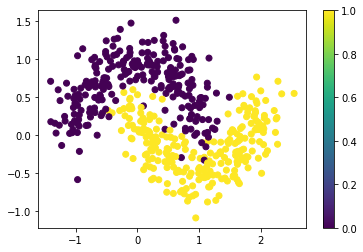

In [58]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()

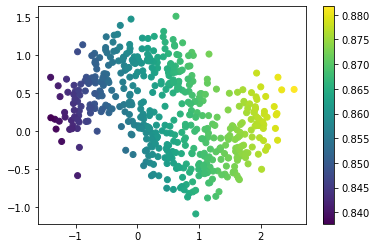

In [59]:
plt.scatter(X[:,0], X[:,1], c = out2)
plt.colorbar()

In [60]:
def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

In [61]:
get_accuracy(out2, y)

0.5

# Keras

In [63]:
X, y = make_moons(n_samples=500,noise=0.2,random_state=3)

In [64]:
X[0].shape

(2,)

In [65]:
from tensorflow.keras import backend as K

K.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()

In [66]:
model.add(InputLayer(input_shape=(X[0].shape)))

In [67]:
model.add(Dense(units=4,activation='sigmoid'))

In [68]:
model.add(Dense(units=1,activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
callback = EarlyStopping(monitor='val_loss',mode='min',patience=5,min_delta=0.001,restore_best_weights=True)

In [73]:
training = model.fit(X,y,callbacks=[callback],batch_size=64,epochs=500,validation_split=0.3)

Epoch 1/500
6/6 [==============================] - 1s 26ms/step - loss: 0.7485 - accuracy: 0.5057 - val_loss: 0.7642 - val_accuracy: 0.4867
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.7425 - accuracy: 0.5057 - val_loss: 0.7579 - val_accuracy: 0.4867
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.7369 - accuracy: 0.5057 - val_loss: 0.7518 - val_accuracy: 0.4867
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.7313 - accuracy: 0.5057 - val_loss: 0.7459 - val_accuracy: 0.4867
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.7256 - accuracy: 0.5057 - val_loss: 0.7403 - val_accuracy: 0.4867
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.7202 - accuracy: 0.5057 - val_loss: 0.7348 - val_accuracy: 0.4867
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.7153 - accuracy: 0.5057 - val_loss: 0.7293 - val_accuracy: 0.4867
Epoch 8/500
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.5622 - accuracy: 0.7771 - val_loss: 0.5677 - val_accuracy: 0.7667
Epoch 60/500
6/6 [==============================] - 0s 7ms/step - loss: 0.5602 - accuracy: 0.7886 - val_loss: 0.5657 - val_accuracy: 0.7800
Epoch 61/500
6/6 [==============================] - 0s 9ms/step - loss: 0.5583 - accuracy: 0.7971 - val_loss: 0.5637 - val_accuracy: 0.7800
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5563 - accuracy: 0.8000 - val_loss: 0.5617 - val_accuracy: 0.7800
Epoch 63/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.7971 - val_loss: 0.5598 - val_accuracy: 0.7867
Epoch 64/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5526 - accuracy: 0.7943 - val_loss: 0.5578 - val_accuracy: 0.7933
Epoch 65/500
6/6 [==============================] - 0s 5ms/step - loss: 0.5506 - accuracy: 0.8029 - val_loss: 0.5559 - val_accuracy: 0.7933
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.8486 - val_loss: 0.4698 - val_accuracy: 0.8200
Epoch 118/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4628 - accuracy: 0.8486 - val_loss: 0.4685 - val_accuracy: 0.8200
Epoch 119/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4614 - accuracy: 0.8486 - val_loss: 0.4671 - val_accuracy: 0.8200
Epoch 120/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4600 - accuracy: 0.8486 - val_loss: 0.4658 - val_accuracy: 0.8200
Epoch 121/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4586 - accuracy: 0.8514 - val_loss: 0.4644 - val_accuracy: 0.8200
Epoch 122/500
6/6 [==============================] - 0s 11ms/step - loss: 0.4572 - accuracy: 0.8514 - val_loss: 0.4631 - val_accuracy: 0.8200
Epoch 123/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4558 - accuracy: 0.8514 - val_loss: 0.4618 - val_accuracy: 0.8200
Epoch 124/500
6/6 [=======

6/6 [==============================] - 0s 6ms/step - loss: 0.3963 - accuracy: 0.8543 - val_loss: 0.4060 - val_accuracy: 0.8200
Epoch 176/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8543 - val_loss: 0.4051 - val_accuracy: 0.8200
Epoch 177/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3944 - accuracy: 0.8543 - val_loss: 0.4043 - val_accuracy: 0.8200
Epoch 178/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3936 - accuracy: 0.8543 - val_loss: 0.4034 - val_accuracy: 0.8200
Epoch 179/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3926 - accuracy: 0.8543 - val_loss: 0.4026 - val_accuracy: 0.8200
Epoch 180/500
6/6 [==============================] - 0s 7ms/step - loss: 0.3918 - accuracy: 0.8543 - val_loss: 0.4018 - val_accuracy: 0.8267
Epoch 181/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3909 - accuracy: 0.8543 - val_loss: 0.4009 - val_accuracy: 0.8267
Epoch 182/500
6/6 [======

6/6 [==============================] - 0s 10ms/step - loss: 0.3530 - accuracy: 0.8543 - val_loss: 0.3673 - val_accuracy: 0.8267
Epoch 233/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8543 - val_loss: 0.3668 - val_accuracy: 0.8267
Epoch 234/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8543 - val_loss: 0.3663 - val_accuracy: 0.8267
Epoch 235/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8543 - val_loss: 0.3658 - val_accuracy: 0.8267
Epoch 236/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.8543 - val_loss: 0.3653 - val_accuracy: 0.8267
Epoch 237/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3499 - accuracy: 0.8543 - val_loss: 0.3648 - val_accuracy: 0.8200
Epoch 238/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8543 - val_loss: 0.3643 - val_accuracy: 0.8200
Epoch 239/500
6/6 [=======

6/6 [==============================] - 0s 8ms/step - loss: 0.3233 - accuracy: 0.8600 - val_loss: 0.3427 - val_accuracy: 0.8400
Epoch 291/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3228 - accuracy: 0.8629 - val_loss: 0.3423 - val_accuracy: 0.8400
Epoch 292/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3224 - accuracy: 0.8629 - val_loss: 0.3420 - val_accuracy: 0.8400
Epoch 293/500
6/6 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8629 - val_loss: 0.3417 - val_accuracy: 0.8400
Epoch 294/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3216 - accuracy: 0.8629 - val_loss: 0.3413 - val_accuracy: 0.8400
Epoch 295/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3212 - accuracy: 0.8629 - val_loss: 0.3410 - val_accuracy: 0.8400
Epoch 296/500
6/6 [==============================] - 0s 5ms/step - loss: 0.3208 - accuracy: 0.8629 - val_loss: 0.3407 - val_accuracy: 0.8400
Epoch 297/500
6/6 [=======

6/6 [==============================] - 0s 9ms/step - loss: 0.3033 - accuracy: 0.8743 - val_loss: 0.3276 - val_accuracy: 0.8467
Epoch 349/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3030 - accuracy: 0.8743 - val_loss: 0.3274 - val_accuracy: 0.8467
Epoch 350/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3028 - accuracy: 0.8743 - val_loss: 0.3272 - val_accuracy: 0.8467
Epoch 351/500
6/6 [==============================] - 0s 7ms/step - loss: 0.3025 - accuracy: 0.8743 - val_loss: 0.3270 - val_accuracy: 0.8467
Epoch 352/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.8743 - val_loss: 0.3268 - val_accuracy: 0.8467
Epoch 353/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3019 - accuracy: 0.8743 - val_loss: 0.3266 - val_accuracy: 0.8467
Epoch 354/500
6/6 [==============================] - 0s 7ms/step - loss: 0.3017 - accuracy: 0.8743 - val_loss: 0.3264 - val_accuracy: 0.8467
Epoch 355/500
6/6 [======

In [74]:
import pandas as pd 
logs = pd.DataFrame(training.history)

In [75]:
logs

,loss,accuracy,val_loss,val_accuracy
0,0.748476,0.505714,0.764210,0.486667
1,0.742480,0.505714,0.757946,0.486667
2,0.736903,0.505714,0.751833,0.486667
3,0.731337,0.505714,0.745912,0.486667
4,0.725600,0.505714,0.740257,0.486667
...,...,...,...,...
351,0.302183,0.874286,0.326787,0.846667
352,0.301946,0.874286,0.326598,0.846667
353,0.301688,0.874286,0.326409,0.846667
354,0.301391,0.874286,0.326218,0.846667


<AxesSubplot:>

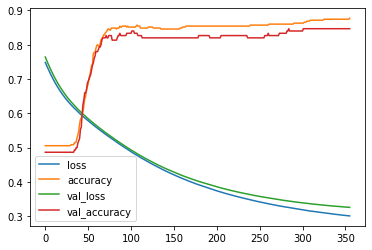

In [76]:
logs.plot()

<AxesSubplot:>

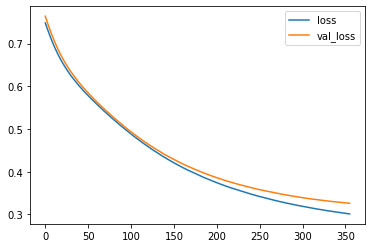

In [77]:
logs[['loss','val_loss']].plot()

In [78]:
model.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8660


[0.3096959590911865, 0.8659999966621399]

In [79]:
ypred = np.round(model.predict(X))

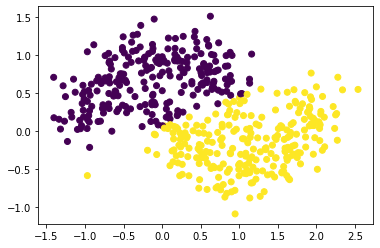

In [80]:
plt.scatter(X[:,0],X[:,1],c=ypred)

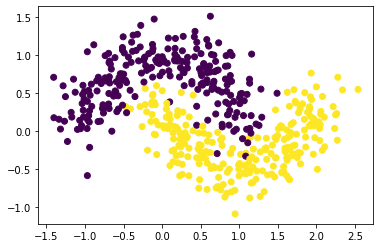

In [81]:
plt.scatter(X[:,0],X[:,1],c=y)

In [82]:
#!pip install --yes pydot
#!conda install python-graphviz --yes

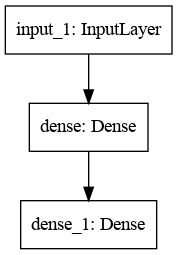

In [83]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(model,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

In [84]:
from tensorflow.keras.models import load_model

model.save("model_moons.h5")
# here you can stop your notebook
moons_model = load_model("model_moons.h5")
moons_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.get_weights()

[array([[ 0.58573735, -1.136558  , -0.2228677 , -1.0123973 ],
        [-2.3020296 ,  2.083782  ,  2.135817  ,  1.9949942 ]],
       dtype=float32),
 array([ 0.6896438 , -0.2930722 , -0.708034  , -0.36153612], dtype=float32),
 array([[ 2.0011191],
        [-2.1719904],
        [-0.8579365],
        [-1.7708973]], dtype=float32),
 array([0.8404255], dtype=float32)]

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [87]:
model_ = Sequential([
    Dense(units=4,activation='relu',input_shape=X[0].shape),
    Dense(units=8,activation='relu'),
    Dense(units=1,activation='sigmoid')
])

In [88]:
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [89]:
#!pip install seaborn

Text(33.0, 0.5, 'y_true')

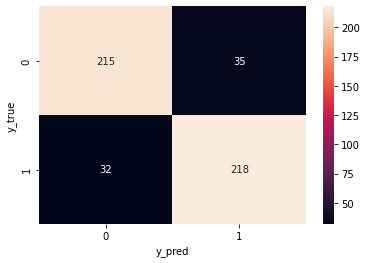

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y,ypred),annot=True,fmt='.3g')
plt.xlabel('y_pred')
plt.ylabel('y_true')

In [91]:
np.unique(y,return_counts=True)

(array([0, 1]), array([250, 250]))